# Scipy-Stats

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import collections as co
import scipy.special as spec
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


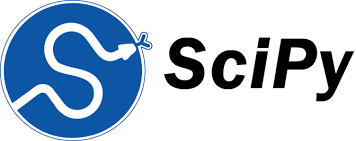

## What is SciPy.Stats?
***

This module contains a large number of probability distributions, summary and frequency statistics, correlation functions and statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more. [1]

In short it is a tool in python that allows us to perform highly advanced statistical methods using only a very short few commands. It is one of the world most copetitive libraries of statisctical tools, and i is completely free.

Here we will be using this module to reform a very popular technique for analysing the means of several groups of data in order to analyse the relationship between the means of the groups. This test is a way of validating the relevance of data between data groups, and is a great example of just one of the counltess tools this module has to offer.

# ANOVA
***

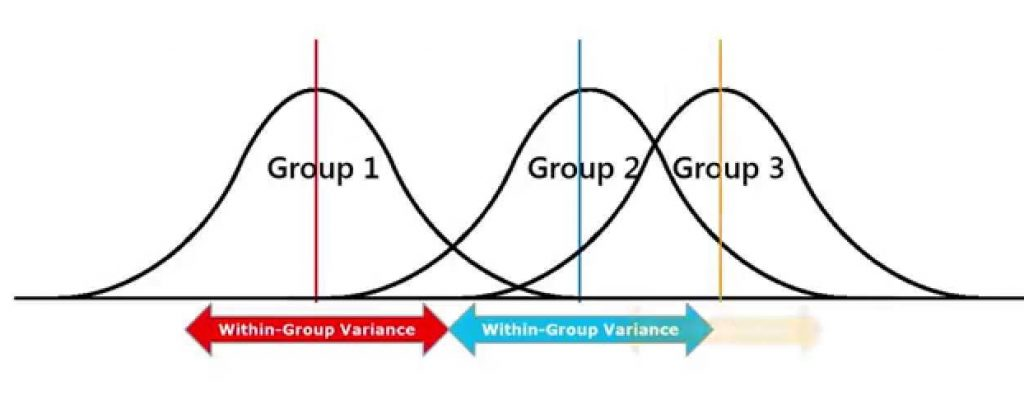

## Iris dataset ANOVA:

First up we have the classic Iris dataset. This is an ANOVA test that we did during our lectures, so the code comes from there.

Here we try to fit the data to the 6 assumptions, however we find that the data doesn't fit assumption 6. Thus we use a different ANOVA test model call Welsh's model to work on the dataset instead. We can then see by the P values in the results that the means of the three datasets are in fact different.

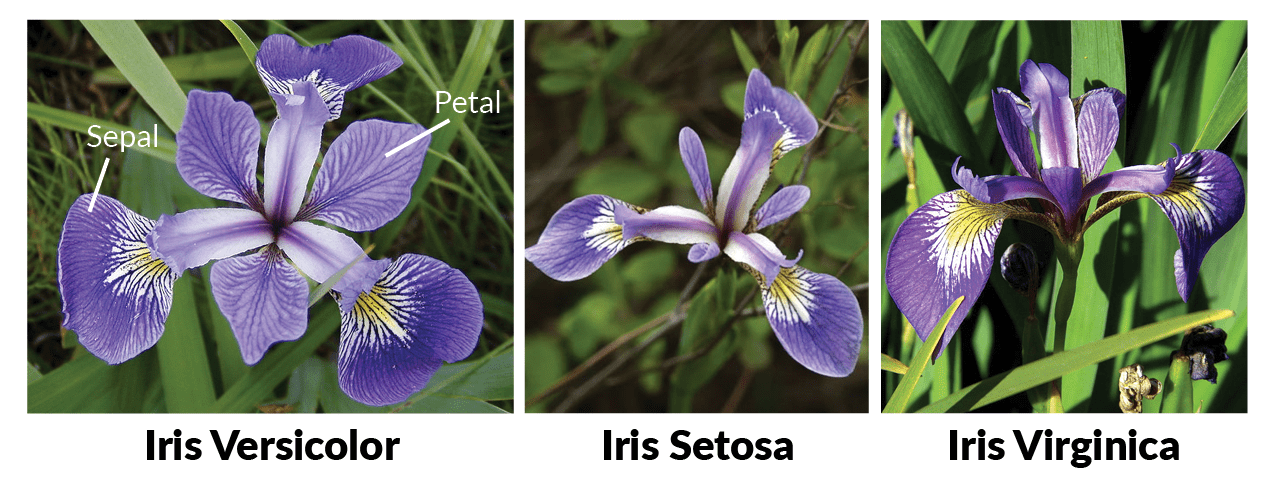

In [2]:
# read in from csv:
df = pd.read_csv('https://github.com/ianmcloughlin/datasets/raw/main/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<br>

#### Assumtion 1: Dependent Variable:
***

Is the dependent variable measured at an interval or ratio level? Yes.

In [3]:
# Set numerical variable:
dependent = df['sepal_length']
dependent

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [4]:
# describe:
dependent.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

<br>

#### Assumption 2: Independent Variable:

Des the categorical variable consist of 2 or more independant grous? Yes, it has 3:

In [5]:
# independent variable (should be categorical):
independent = df['species']
independent

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [6]:
independent.describe()

count            150
unique             3
top       versicolor
freq              50
Name: species, dtype: object

<br>

Assumption 3: Independence of observations:
***

Here we know that there are no repeat instance of the data points, and that the data is divided into three independent groups who do not affect each other.

<br>

#### Assumption 4: Outliers:
***

By using these box charts we can calculate if the data lies outside of bounds deemed reasonable for the study. We do see one instance of an outlier, however for the purpose of the exercise we continue regardless.

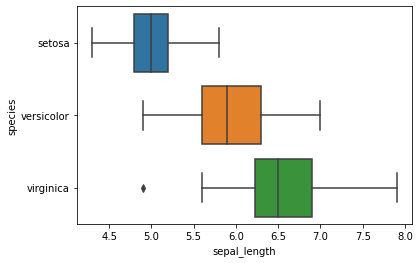

In [7]:
# identify outliers:
sns.boxplot(x=dependent, y=independent)

<br>

#### Assumtion 5: Normality:
***

Does the data adhere to a normal distribution model? We can se by the shapiro test that it does:

In [8]:
#Kernel Density Estimates of the three categories:
sns.displot(data=penguins, x=dependent, hue=independent, kind="kde")

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sepal_len_setosa = dependent[independent == 'setosa']
sepal_len_setosa

In [ ]:
# Run the SHapiro-WIlk test:
ss.shapiro(sepal_len_setosa)

In [ ]:
ss.shapiro(dependent[independent == 'versicolor'])

In [9]:
ss.shapiro(dependent[independent == 'virginica'])

ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)

<br>

#### Assumption 6: Homogeneity of Variances:
***

Here we can see that our data is actually outside of the bounds we would normally need for the ANOVA test to be valid. We will continue for now, but we will have to remedy this later.

In [10]:
#Levene's test for equal variances:
ss.levene(
    dependent[independent == 'setosa'],
    dependent[independent == 'versicolor'],
    dependent[independent == 'virginica']
)

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

<br>

## One Way ANOVA:

***

In [ ]:
#ANOVA
ss.f_oneway(
    dependent[independent == 'setosa'],
    dependent[independent == 'versicolor'],
    dependent[independent == 'virginica']
)

In [ ]:
def welch_anova_np(*args, var_equal=False):
    # https://svn.r-project.org/R/trunk/src/library/stats/R/oneway.test.R
    # translated from R Welch ANOVA (not assuming equal variance)

    F_onewayResult = co.namedtuple('F_onewayResult', ('statistic', 'pvalue'))

    args = [np.asarray(arg, dtype=float) for arg in args]
    k = len(args)
    ni = np.array([len(arg) for arg in args])
    mi = np.array([np.mean(arg) for arg in args])
    vi = np.array([np.var(arg,ddof=1) for arg in args])
    wi = ni/vi

    tmp =sum((1-wi/sum(wi))**2 / (ni-1))
    tmp /= (k**2 -1)

    dfbn = k - 1
    dfwn = 1 / (3 * tmp)

    m = sum(mi*wi) / sum(wi)
    f = sum(wi * (mi - m)**2) /((dfbn) * (1 + 2 * (dfbn - 1) * tmp))
    prob = spec.fdtrc(dfbn, dfwn, f)   # equivalent to stats.f.sf
    return F_onewayResult(f, prob)

In [ ]:
welch_anova_np(
    dependent[independent == 'setosa'],
    dependent[independent == 'versicolor'],
    dependent[independent == 'virginica']    
)

**Conclusion:** The mean sepal length of Setosas, Versicolors and Virginicas are different.

Do post opp tests.

# Second ANOVA Test:

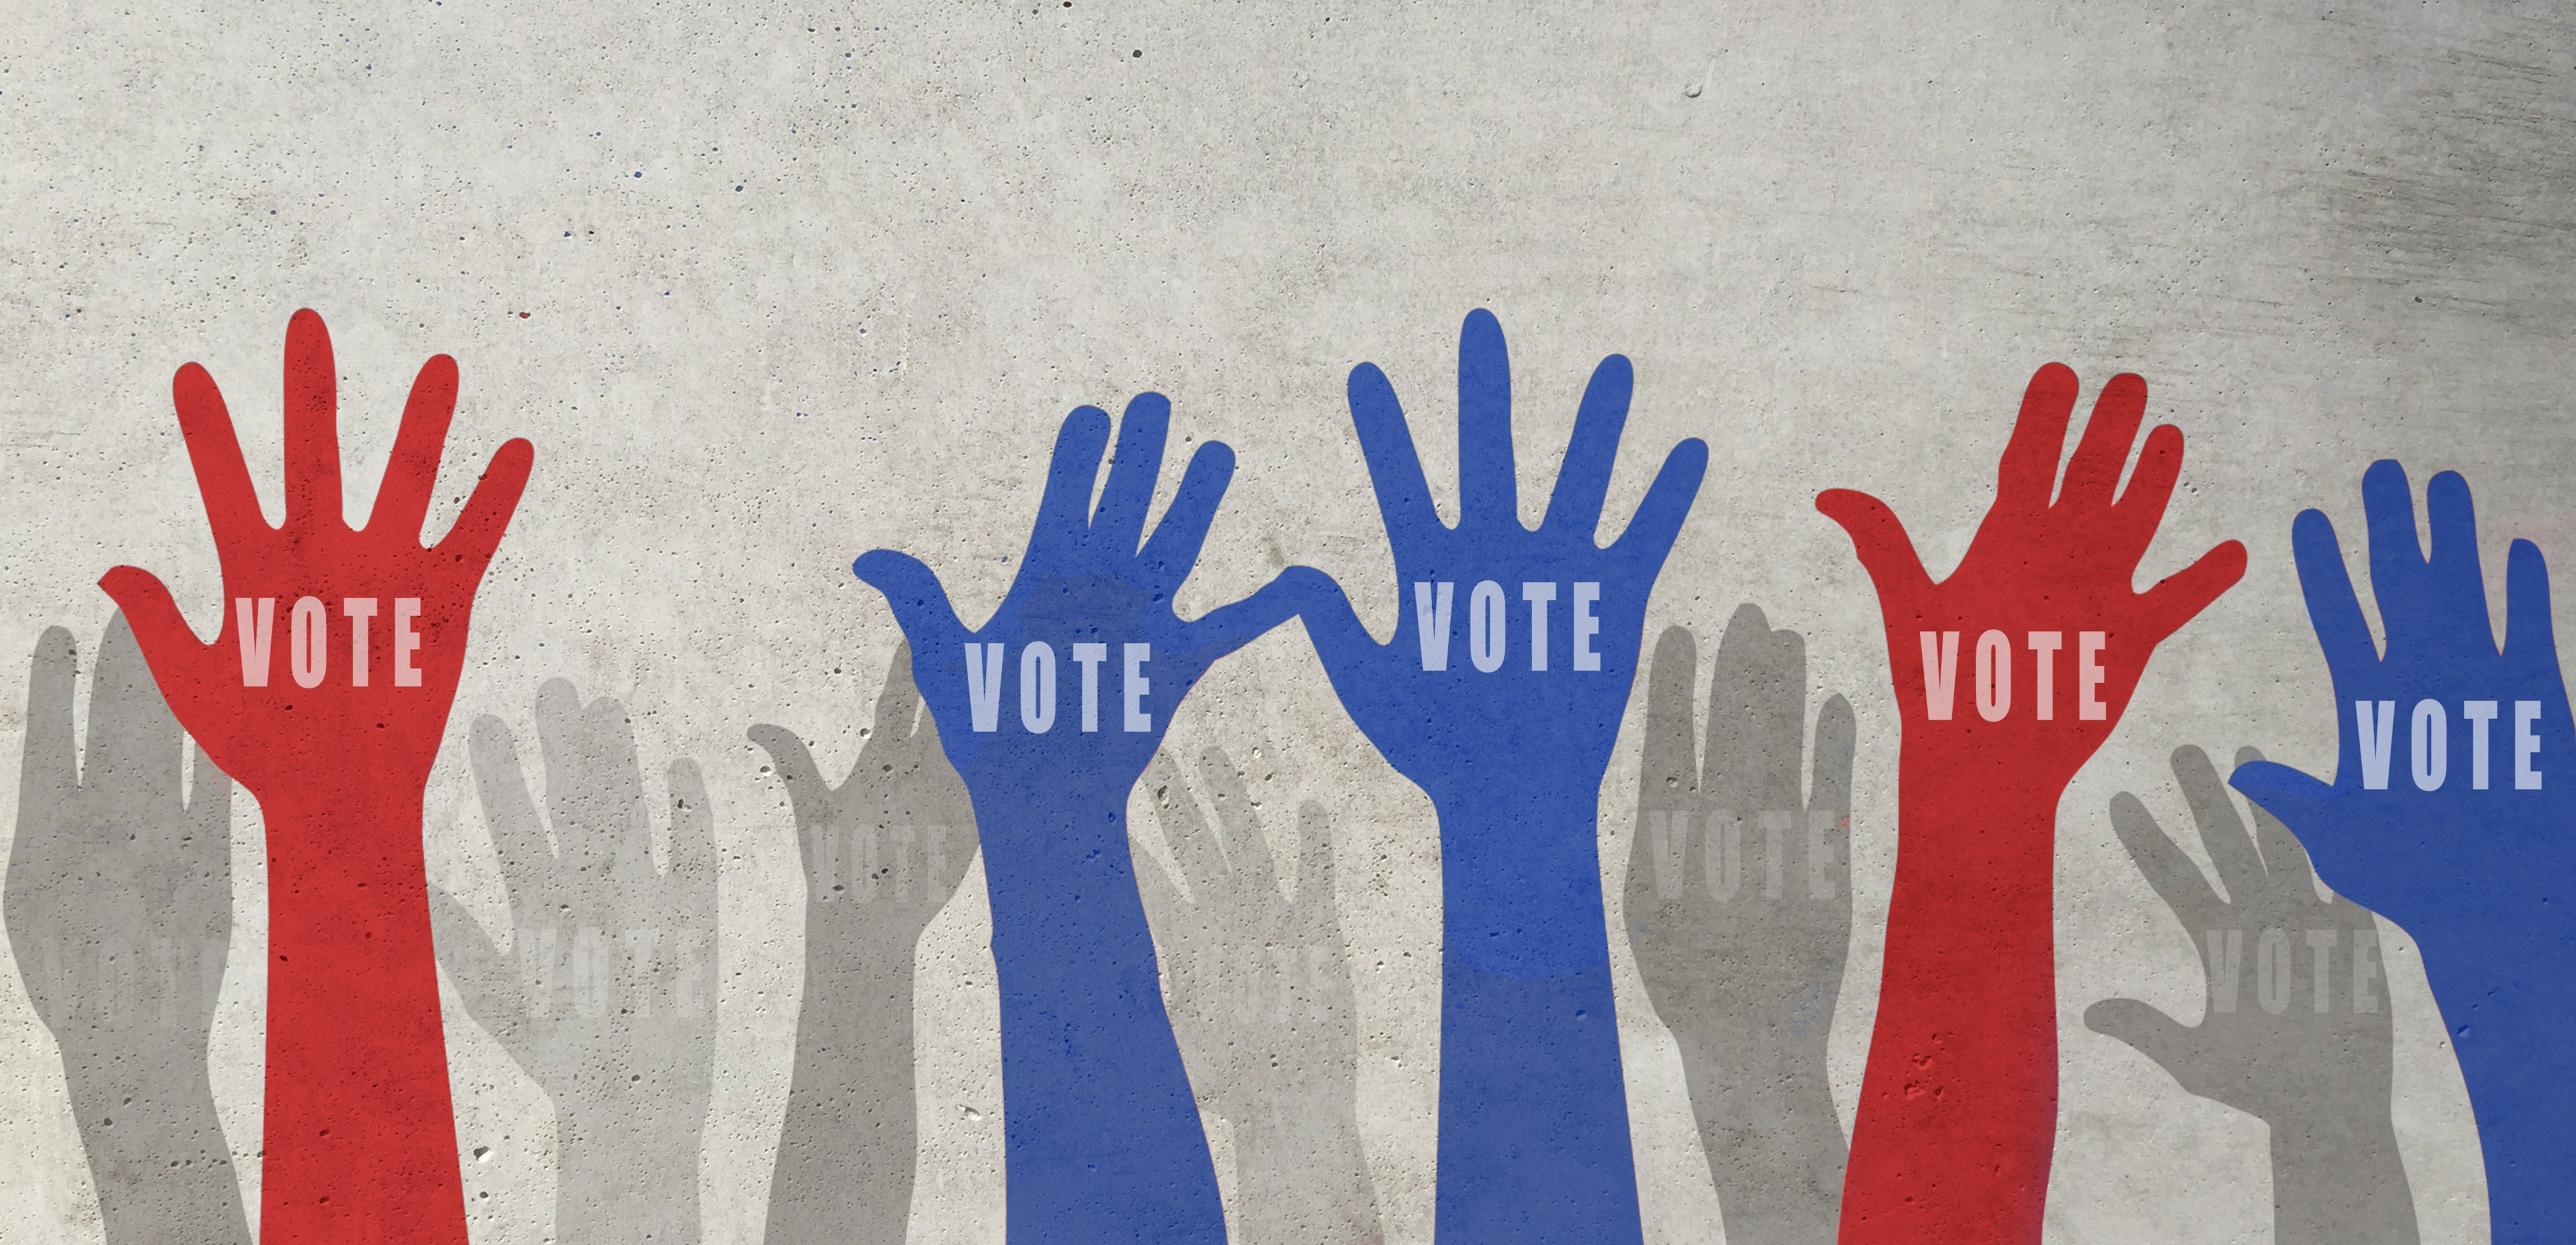

We have seen previously that t-tests are used to compare the means of two groups of data. An ANOVA test or "Analysis of Variance" test is a test that is used in a similar fashion to the t-test, but can be used for more than 2 groups at once. For example if we wanted to test whether voter age differs based on some categorical variable such as race, we would need to ake several groups of different races and measure the means of the ages for each, then compare these results to see how they are related.

We could carry out individual t-tests for each pair of groups, however with each iteration of a t-test the posibilility of a false positive increases quite a lot. This test is designed to do this with minimum risk of a false positive.

In the previous ANOVA test we ended up finding out throughour assumptions that the data was not necessarily suitable to the ANOVA test. We were able to resolve this issue by performing an altered ANOVA test designed to accomodate datasets that did not ahere to assumption 6: Homogenity of variences. But what if we were to have a dataset that we knew did fit the set of assumtptions? What would the results look like then? 

Next we will generate our own data so that we already know that is fits the assumption model, and we will be able to see how the results turn out.

In [41]:
# https://www.youtube.com/watch?v=EWYzeZbchR0

np.random.seed(10)

races = ["asian", "black", "hispanic", "other", "white"]

# Generate random data:
voter_race = np.random.choice(a = races,
                            p = [0.05,0.15,0.25,0.05,0.5],
                             size = 1000)
independent2 = voter_race

voter_age = ss.poisson.rvs(loc=18,
                             mu=30,
                             size=1000)

dependent2 =voter_age

In this case our dependent variable is the age of the voters, and the categorical variable is the race of the voters. 

Here we already know that the means are not different, as they are all generated using the same distribution. 

**Assumption 1:** Dependent variable is measured.

**Assumption 2:** Independent variable is categorical.

**Assumption 3:** onbservations are generated independently.

**Assumption 4:** Have not generated any significant outliers.

**Assumption 5:** in this case our poisson distribution has a high enough mean that it generates a distribution that can be described as normal.

**Assumption 6:** Varience is homogenic.

In [49]:
ss.shapiro(dependent2[independent2 == 'asian'])

ShapiroResult(statistic=0.9777554869651794, pvalue=0.34113651514053345)

In [50]:
ss.shapiro(dependent2[independent2 == 'black'])

ShapiroResult(statistic=0.9906416535377502, pvalue=0.4033951461315155)

In [51]:
ss.shapiro(dependent2[independent2 == 'hispanic'])

ShapiroResult(statistic=0.9935224056243896, pvalue=0.3508366644382477)

In [52]:
ss.shapiro(dependent2[independent2 == 'other'])

ShapiroResult(statistic=0.9815746545791626, pvalue=0.772683322429657)

In [53]:
ss.shapiro(dependent2[independent2 == 'white'])

ShapiroResult(statistic=0.9945854544639587, pvalue=0.07665358483791351)

In [54]:
#Levene's test for equal variances:
ss.levene(
    dependent2[independent2 == 'asian'],
    dependent2[independent2 == 'black'],
    dependent2[independent2 == 'hispanic'],
    dependent2[independent2 == 'other'],
    dependent2[independent2 == 'white'],
)

LeveneResult(statistic=0.6716179975462752, pvalue=0.6117462045131903)

In [55]:
# Group age data by race
voter_frame = pd.DataFrame({'race': voter_race, 'age': voter_age})
groups = voter_frame.groupby('race').groups

In [56]:
# Extract individual groups:
asian = voter_age[groups['asian']]
black = voter_age[groups['black']]
hispanic = voter_age[groups['hispanic']]
other = voter_age[groups['other']]
white = voter_age[groups['white']]

In [57]:
# perform the ANOVA
ss.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.3420371024157927, pvalue=0.25239557668570217)

**Conclusion:** The low p value above indivates that there is no significant difference between the means of each group.

# Bibliography

[1] https://docs.scipy.org/doc/scipy/reference/stats.html#:~:text=Statistical%20functions%20(%20scipy.-,stats%20),Monte%20Carlo%20functionality%2C%20and%20more.&text=Seaborn%3A%20statistical%20data%20visualization.

[2] https://www.youtube.com/watch?v=EWYzeZbchR0

[3] https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/#:~:text=ANOVA%20assumes%20that%20the%20data,are%20independent%20of%20each%20other.

[4] http://www.lac.inpe.br/~rafael.santos/Docs/CAP394/WholeStory-Iris.html

[5] https://www.leansixsigmadefinition.com/glossary/anova/